In [1]:
import pandas as pd

import numpy as np

%matplotlib inline

from datetime import datetime

pd.set_option('display.max_rows', None)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

- We focus on understanding the final data structure
- support each step by visual analytics

## John Hopkins GITHUB csv Data

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/13/22', '7/14/22', '7/15/22', '7/16/22', '7/17/22', '7/18/22',
       '7/19/22', '7/20/22', '7/21/22', '7/22/22'],
      dtype='object', length=913)

In [5]:
time_idx=pd_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/13/22', '7/14/22', '7/15/22', '7/16/22', '7/17/22', '7/18/22',
       '7/19/22', '7/20/22', '7/21/22', '7/22/22'],
      dtype='object', length=913)


In [6]:
df_plot=pd.DataFrame({'date':time_idx})
df_plot.tail()

,date
908,7/18/22
909,7/19/22
910,7/20/22
911,7/21/22
912,7/22/22


In [7]:
len(pd_raw['Country/Region'].unique())

199

In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4:].sum(axis=0)

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            1
1/28/20            4
1/29/20            4
1/30/20            4
1/31/20            5
2/1/20             8
2/2/20            10
2/3/20            12
2/4/20            12
2/5/20            12
2/6/20            12
2/7/20            13
2/8/20            13
2/9/20            14
2/10/20           14
2/11/20           16
2/12/20           16
2/13/20           16
2/14/20           16
2/15/20           16
2/16/20           16
2/17/20           16
2/18/20           16
2/19/20           16
2/20/20           16
2/21/20           16
2/22/20           16
2/23/20           16
2/24/20           16
2/25/20           16
2/26/20           21
2/27/20           26
2/28/20           53
2/29/20           66
3/1/20           117
3/2/20           150
3/3/20           188
3/4/20           240
3/5/20           349
3/6/20           534
3/7/20           684
3/8/20           847
3/9/20       

In [9]:
country_list=["Spain","France","Germany","Turkey","Italy"]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))

In [11]:
df_plot

,date,Spain,France,Germany,Turkey,Italy
0,1/22/20,0,0,0,0,0
1,1/23/20,0,0,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,3,0,0,0
4,1/26/20,0,3,0,0,0
5,1/27/20,0,3,1,0,0
6,1/28/20,0,4,4,0,0
7,1/29/20,0,5,4,0,0
8,1/30/20,0,5,4,0,0
9,1/31/20,0,5,5,0,2


<AxesSubplot:xlabel='date'>

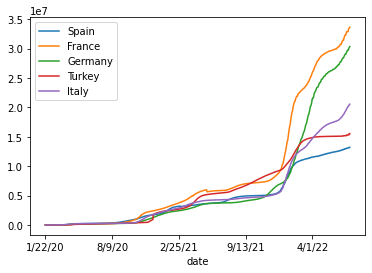

In [12]:
df_plot.set_index('date').plot()


In [13]:
df_plot.head()

,date,Spain,France,Germany,Turkey,Italy
0,1/22/20,0,0,0,0,0
1,1/23/20,0,0,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,3,0,0,0
4,1/26/20,0,3,0,0,0


In [14]:
type(df_plot.date[0])

str

In [15]:
datetime.strptime(df_plot.date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [16]:
time_idx=[datetime.strptime(each, '%m/%d/%y') for each in df_plot.date] # Convert to Datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # Convert date back to string

In [17]:
time_idx[-5:]

[datetime.datetime(2022, 7, 18, 0, 0),
 datetime.datetime(2022, 7, 19, 0, 0),
 datetime.datetime(2022, 7, 20, 0, 0),
 datetime.datetime(2022, 7, 21, 0, 0),
 datetime.datetime(2022, 7, 22, 0, 0)]

In [18]:
df_plot['date']=time_idx

In [19]:
df_plot.head()

,date,Spain,France,Germany,Turkey,Italy
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,3,0,0,0
4,2020-01-26,0,3,0,0,0


In [20]:
df_plot.to_csv('../data/processed/COVID_small_table.csv', sep=';', index=False)

In [41]:
country_population = {"United Kingdom" : 67220000 , "France" : 67390000 , "Belgium" : 11560000 ,"Germany" : 83240000, "Netherlands" : 17440000,"Italy" : 59550000}

In [42]:
relative_cases= df_plot.copy()

In [43]:
for each in country_list:
    relative_cases[each]=relative_cases[each].div(country_population[each]).round(4)

In [44]:
relative_cases

,date,United Kingdom,France,Belgium,Germany,Netherlands,Italy
0,2020-01-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2020-01-23,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2020-01-24,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2020-01-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2020-01-26,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,2020-01-27,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,2020-01-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,2020-01-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,2020-01-30,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,2020-01-31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


<AxesSubplot:xlabel='date'>

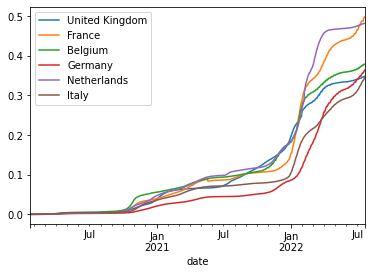

In [45]:
relative_cases.set_index('date').plot()

In [46]:
relative_cases.to_csv('../data/processed/COVID_population_relative_cases.csv', sep=';', index=False)

## Vaccination Data

In [47]:
vacc_path='../data/raw/COVID-19-vacc/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
vacc_raw=pd.read_csv(vacc_path)

In [48]:
vacc_raw.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [49]:
vacc_raw=vacc_raw.drop(columns=["Doses_admin","UID","Province_State","Report_Date_String"])

In [50]:
vacc_raw= vacc_raw.fillna(0)

In [51]:
vacc_raw.head()

,Country_Region,Date,People_partially_vaccinated,People_fully_vaccinated
0,Canada,2020-12-14,0.0,0.0
1,World,2020-12-14,0.0,0.0
2,Canada,2020-12-15,0.0,0.0
3,China,2020-12-15,0.0,0.0
4,Russia,2020-12-15,28500.0,0.0


In [52]:
vacc_base=vacc_raw[(vacc_raw['Date']>'2021-01-02')]

In [53]:
vacc_base.head()

,Country_Region,Date,People_partially_vaccinated,People_fully_vaccinated
342,Argentina,2021-01-03,0.0,0.0
343,Austria,2021-01-03,5027.0,0.0
344,Bahrain,2021-01-03,60689.0,0.0
345,Belarus,2021-01-03,0.0,0.0
346,Belgium,2021-01-03,794.0,0.0


In [54]:
vacc_base=vacc_base.groupby(['Date','Country_Region']).sum().reset_index()

In [55]:
vacc_plot=pd.DataFrame({'date':vacc_base['Date'].unique()})

In [56]:
#vacc_plot
# the date 10.05.2021 is missung for most of the countries either drop it or copy the data from the day before to keep the consistency
vacc_plot=vacc_plot.drop(index=127, axis=0) 

In [57]:
country_list=["United Kingdom","France","Belgium"]

In [58]:
vacc_base[vacc_base["Country_Region"]=="Germany"].iloc[:,:]

,Date,Country_Region,People_partially_vaccinated,People_fully_vaccinated
16,2021-01-03,Germany,300551.0,1021.0
58,2021-01-04,Germany,348935.0,1021.0
102,2021-01-05,Germany,402967.0,1046.0
148,2021-01-06,Germany,465821.0,1047.0
195,2021-01-07,Germany,521675.0,1051.0
242,2021-01-08,Germany,584835.0,1369.0
290,2021-01-09,Germany,646163.0,1415.0
340,2021-01-10,Germany,681516.0,1423.0
390,2021-01-11,Germany,749148.0,1471.0
441,2021-01-12,Germany,831883.0,1521.0


In [59]:
for each in country_list:
    vacc_plot[each]=np.array(vacc_base[vacc_base["Country_Region"]==each].iloc[:,3:])

In [60]:
vacc_plot[:]

,date,United Kingdom,France,Belgium
0,2021-01-03,22002.0,0.0,0.0
1,2021-01-04,22002.0,0.0,0.0
2,2021-01-05,22002.0,0.0,0.0
3,2021-01-06,22002.0,0.0,0.0
4,2021-01-07,22002.0,0.0,1.0
5,2021-01-08,22002.0,0.0,1.0
6,2021-01-09,22002.0,0.0,1.0
7,2021-01-10,391399.0,0.0,1.0
8,2021-01-11,412167.0,0.0,1.0
9,2021-01-12,428232.0,0.0,1.0


In [61]:
type(vacc_plot.date[0])

str

In [62]:
vacc_plot["date"] = pd.to_datetime(vacc_plot["date"])

In [63]:
vacc_plot["date"].tail()

534   2022-06-21
535   2022-06-22
536   2022-06-23
537   2022-06-24
538   2022-06-25
Name: date, dtype: datetime64[ns]

<AxesSubplot:xlabel='date'>

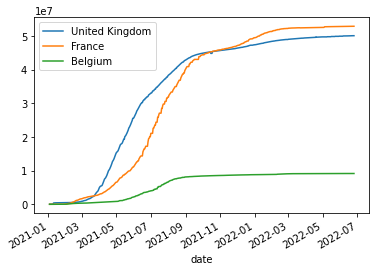

In [64]:
vacc_plot.set_index('date').plot()

In [65]:
vacc_plot.to_csv('../data/processed/Vaccination_small_table.csv', sep=';', index=False)

In [66]:
country_population = {"United Kingdom" : 67220000 , "France" : 67390000 , "Belgium" : 11560000 }

In [67]:
vaccination_rate= vacc_plot.copy()

In [68]:
for each in country_list:
    vaccination_rate[each]=vaccination_rate[each].div(country_population[each]).round(4)*100

In [69]:
vaccination_rate

,date,United Kingdom,France,Belgium
0,2021-01-03,0.03,0.00,0.00
1,2021-01-04,0.03,0.00,0.00
2,2021-01-05,0.03,0.00,0.00
3,2021-01-06,0.03,0.00,0.00
4,2021-01-07,0.03,0.00,0.00
5,2021-01-08,0.03,0.00,0.00
6,2021-01-09,0.03,0.00,0.00
7,2021-01-10,0.58,0.00,0.00
8,2021-01-11,0.61,0.00,0.00
9,2021-01-12,0.64,0.00,0.00


<AxesSubplot:xlabel='date'>

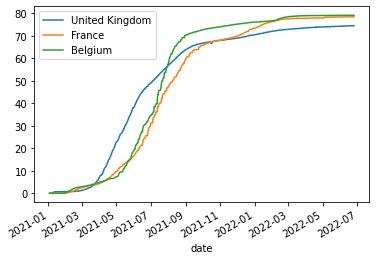

In [70]:
vaccination_rate.set_index('date').plot()

In [71]:
vaccination_rate.to_csv('../data/processed/Vaccination_percentage.csv', sep=';', index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table)

A primary key’s main features are:
- It must contain a unique value for each row of data.
- It can't contain null values.

In [72]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [73]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a string, important for indexing
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,no,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,no,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,no,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,no,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,no,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [74]:
pd_data_base= pd_data_base.drop(columns=["Lat","Long"])
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,no,Albania,0,0,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,no,Algeria,0,0,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,no,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


In [75]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd.head()

state            no                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   

state    ...      no                                                          \
country  ... Uruguay Uzbekistan Vanuatu Venezuela Vietnam West Bank and Gaza   
1/22/20  ...       0          0       0         0       0                  0   
1/23/20  ...       0          0       0         0       2                  0   
1/24/20  ...       0          0       0         0       2                  0   
1/25/20  ...       0          0       0         0       2                  0   
1/26/20  ...       0          0       0         0       2                  0   

state                                               
country Winter Olympics 2022 Yemen Zambia Zimbabwe  
1/22/20                    0     0      0        0  
1/23/20                    0     0      0        0  
1/24/20                    0     0      0        0  
1/25/20                    0     0      0        0  
1/26/20                    0     0      0        0  

[5 rows x 285 columns]

In [76]:
test_pd.columns

MultiIndex([(                          'no',          'Afghanistan'),
            (                          'no',              'Albania'),
            (                          'no',              'Algeria'),
            (                          'no',              'Andorra'),
            (                          'no',               'Angola'),
            (                          'no',           'Antarctica'),
            (                          'no',  'Antigua and Barbuda'),
            (                          'no',            'Argentina'),
            (                          'no',              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                          'no',              'Uruguay'),
            (                          'no',           'Uzbekistan'),
            (                          'no',              'Vanuatu'),
            (                          'no',            'Venezuela'),
    

In [77]:
pd_relational_model=test_pd.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'},)

In [78]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [79]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [80]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [81]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [82]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';', index=False)

In [83]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,Anguilla,United Kingdom,0.0
2,2020-01-22,Anhui,China,1.0
3,2020-01-22,Aruba,Netherlands,0.0
4,2020-01-22,Australian Capital Territory,Australia,0.0


In [84]:
pd_relational_model.tail()

,date,state,country,confirmed
260200,2022-07-22,no,West Bank and Gaza,672039.0
260201,2022-07-22,no,Winter Olympics 2022,535.0
260202,2022-07-22,no,Yemen,11849.0
260203,2022-07-22,no,Zambia,328550.0
260204,2022-07-22,no,Zimbabwe,256217.0


In [85]:
pd_relational_model[270:300]

,date,state,country,confirmed
270,2020-01-22,no,US,1.0
271,2020-01-22,no,Uganda,0.0
272,2020-01-22,no,Ukraine,0.0
273,2020-01-22,no,United Arab Emirates,0.0
274,2020-01-22,no,United Kingdom,0.0
275,2020-01-22,no,Uruguay,0.0
276,2020-01-22,no,Uzbekistan,0.0
277,2020-01-22,no,Vanuatu,0.0
278,2020-01-22,no,Venezuela,0.0
279,2020-01-22,no,Vietnam,0.0


## Group-by apply

In [86]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0


In [87]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20') & (pd_JH_data['date']<'2020-04-19')]

In [88]:
test_data

,date,state,country,confirmed
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17203,2020-03-22,no,US,34944.0
17425,2020-03-23,no,Germany,22672.0
17473,2020-03-23,no,US,46096.0
17710,2020-03-24,no,Germany,27436.0
17773,2020-03-24,no,US,56714.0
17994,2020-03-25,no,Germany,31554.0
18044,2020-03-25,no,US,68841.0


In [89]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-04-18,no,137439.0
US,2020-04-18,no,738464.0


In [90]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [91]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                       
no    Germany  2020-04-18   137439.0
      US       2020-04-18   738464.0

In [92]:
# this command will only work when adapting the get_doubling_time_via_regression function
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

AssertionError: 

In [ ]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [ ]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [ ]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [ ]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result.head()

In [ ]:
pd_JH_data=pd_JH_data.reset_index()

pd_JH_data.head()

In [ ]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')

In [ ]:
pd_result_larg[17000:17800]

## Filter the data with groupby apply

In [ ]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=11):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=11, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           11, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [ ]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

## Filtered doubling rate

In [ ]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

In [ ]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [ ]:
pd_result_larg.tail()

In [ ]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)